#Recommender Systems: Latent Factor Model


In [ ]:
#importing all relevent packages
import time
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 

In [ ]:
#reading input files and storing it to test and train data frames
df_test = pd.read_csv('/content/drive/My Drive/test_dataset.csv')
df_train = pd.read_csv('/content/drive/My Drive/training_dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#converting relevent columns of the dataframe to the np array
np_test_ratings = df_test[['user_id', 'item_id', 'rating']].to_numpy()
np_train_ratings = df_train[['user_id', 'item_id', 'rating']].to_numpy()

In [ ]:
#Getting max values from train and test data to identify maximum number of users and maximum number of movies
np_test_max = np_test_ratings.max(axis=0)
np_train_max = np_train_ratings.max(axis=0)

In [ ]:
users = max(np_train_max[0],np_test_max[0])
print("Total number of users: " + str(users))

Total number of users: 943


In [ ]:
items = max(np_train_max[1],np_test_max[1])
print("Total number of movies: " + str(items))

Total number of movies: 1682


In [ ]:
avg_rating = df_train["rating"].mean()
print("Average rating of the training dataset: " + str(avg_rating))

Average rating of the training dataset: 3.535


In [ ]:
#Predicted value depending avg rating given by any user to all the movies rated by him
#average rating got by any movie, average rating from the training data and the guess rating from P and Q matrix
def predict(user_id, item_id) -> float:
  return avg_rating + b_i[item_id] + b_u[user_id] + sum(Q[:, item_id] * P[:, user_id])

In [ ]:
#function to return the rmse error it gets the differece of predicted and actual rating and produces the rms value
#adding all rmse values to a list to plot those values against each iteration
def error(data):
  sq_err = 0
  for user_id, item_id, rating in data:
      predicted_rating = predict(user_id, item_id)
      d = predicted_rating - rating
      sq_err += d**2
  rmse = np.sqrt(sq_err / len(data))
  return rmse

In [ ]:
#this function adjust the P and Q matricies values which we have stocastically guessed and it takes those values to the closer to the rating values
#since we deal with SVD of the utitlity matrix product of Q and P transpose will give us the actual predicted rating here we use lambda as regularization parameter
#which adds complexity to the function. Lambda can be any non-negative value but it is advised to have this values around 1
#gamma is the step increment or decrement parameter. Choosing appropriate gamma values is critical to hit the precision
def step(user_id, item_id, actual_rating, gamma, lambda_):        
  err_ui = actual_rating - predict(user_id, item_id)
  b_i[item_id] += gamma * (err_ui - lambda_ * b_u[user_id])
  b_u[user_id] += gamma * (err_ui - lambda_ * b_i[item_id])
  P[:, user_id] += gamma * (
      err_ui * Q[:, item_id] - lambda_ * P[:, user_id]
  )
  Q[:, item_id] += gamma * (
      err_ui * P[:, user_id] - lambda_ * Q[:, item_id]
  )

In [ ]:
#This function trains model for given number of iterations
#lambda is normalization parameter it can be any non negative value
#and gamma is value to be incremented or decremented in a step function
def train(data, iterations, gamma, lambda_):
  for iteration in range(iterations):
      start, done = time.time(), 0
      for i, idx in enumerate(np.random.permutation(len(data))):
          step(*data[idx], gamma, lambda_)
      print()
      yield iteration + 1, time.time() - start

In [ ]:
num_items = items + 1
num_users = users + 1
num_factors = 25
num_epochs = 40
gamma = 0.01
lambda_ = 0.1

rmse_li = list()

b_u = np.zeros((num_users,), dtype=np.float32)
b_i = np.zeros((num_items,), dtype=np.float32)

#P = np.random.normal(scale=0.1, size=(num_factors, num_users))
#Q = np.random.normal(scale=0.1, size=(num_factors, num_items))

Q = np.random.rand(num_factors, num_items)*np.sqrt(5/num_factors)
P = np.random.rand(num_factors, num_users)*np.sqrt(5/num_factors)

In [ ]:
train_ratings, test_ratings = np_train_ratings, np_test_ratings
start = time.time()
for i, epoch_time in train(train_ratings, num_epochs, gamma, lambda_):
    rmse_train = error(train_ratings)
    rmse_test = error(test_ratings)
    print(f"{i}." + " RMSE_Train = {:.4f} ||".format(rmse_train) + " RMSE_Test = {:.4f}".format(rmse_test))
    rmse_li.append(rmse_test)
print("")
print("Execution finished in: {:.0f}s".format(time.time() - start))


1. RMSE_Train = 0.9733 || RMSE_Test = 0.9864

2. RMSE_Train = 0.9367 || RMSE_Test = 0.9535

3. RMSE_Train = 0.9200 || RMSE_Test = 0.9421

4. RMSE_Train = 0.9107 || RMSE_Test = 0.9312

5. RMSE_Train = 0.9040 || RMSE_Test = 0.9245

6. RMSE_Train = 0.8989 || RMSE_Test = 0.9201

7. RMSE_Train = 0.8947 || RMSE_Test = 0.9182

8. RMSE_Train = 0.8911 || RMSE_Test = 0.9162

9. RMSE_Train = 0.8878 || RMSE_Test = 0.9153

10. RMSE_Train = 0.8842 || RMSE_Test = 0.9126

11. RMSE_Train = 0.8806 || RMSE_Test = 0.9126

12. RMSE_Train = 0.8770 || RMSE_Test = 0.9091

13. RMSE_Train = 0.8730 || RMSE_Test = 0.9080

14. RMSE_Train = 0.8691 || RMSE_Test = 0.9065

15. RMSE_Train = 0.8657 || RMSE_Test = 0.9049

16. RMSE_Train = 0.8618 || RMSE_Test = 0.9057

17. RMSE_Train = 0.8582 || RMSE_Test = 0.9036

18. RMSE_Train = 0.8555 || RMSE_Test = 0.9030

19. RMSE_Train = 0.8529 || RMSE_Test = 0.9041

20. RMSE_Train = 0.8507 || RMSE_Test = 0.9056

21. RMSE_Train = 0.8490 || RMSE_Test = 0.9060

22. RMSE_Train = 0.84

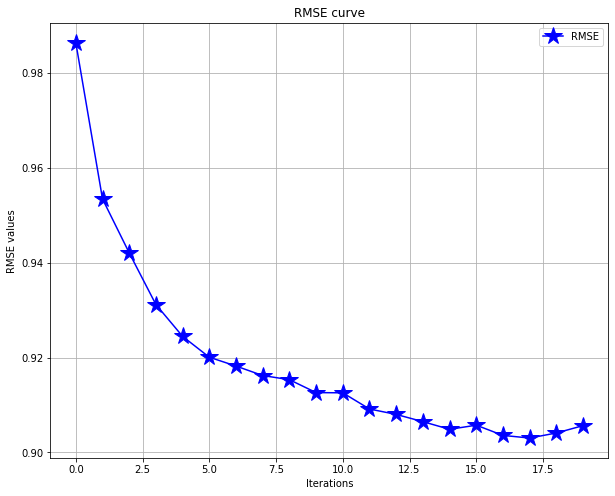

In [ ]:
#Plot
li = list()
temp = list()
if len(rmse_li) > 20:
  limit = 20
else:
  limit = len(rmse_li) 
for i in range(0,limit):
  li.append(i)
  temp.append(rmse_li[i])

figure, axes = plt.subplots(1,1,figsize=(10,8))            # setting up the plot parameters

axes.grid()
axes.plot(li, temp, 'b*-',ms=18 , label='RMSE') # plot with euclidean distance
axes.set_title('RMSE curve')
axes.set_xlabel('Iterations')
axes.set_ylabel('RMSE values')
axes.legend()

plt.show()
rmse_li.clear()
temp.clear()

# Comparison of CF and LF:
Collaborative filtering does not yield the best results because of the sparse utility matrix and with CF, its difficult to recommend or predict the rating of a movie which has not been rated before at all.

Since in LF, we make an educated guess and take the similarity of items in account, it is possible to predict or recommend a movie which has not been rated before. SVD facilitates with latent factors which yields better results. 

Appropriate selection of the normalization factor is crucial for varying the complexity of the model. By changing the normalization factor we can precisely the ratings.

LF performs better than CF because most of the entries in the utility matrix are usually missing and those won't be considered in collaborative filtering. On the other hand, LF assumes some arbitrary values at each and every entry in the matrix and model will be trained with the help of gradient descent so that all the entries will approach closer to the actual ratings.